In [1]:
using TaylorSeries
using PyPlot

INFO: Loading help data...


Modelemos la red: 
$$N_1 \rightarrow ^+N_2 \rightarrow ^+ N3 $$ 

por 

$$\tau_1 \ddot{x_1}+\dot{x_1}=\omega_1+ A_1 cos(x_1)+\rho(t) $$

$$\tau_2 \ddot{x_2}+\dot{x_2}=\omega_2+ A_2 cos(x_2)+A_3cos(x_1+\phi_{12})$$

$$\tau_3 \ddot{x_3}+\dot{x_3}=\omega_3+ A_4 cos(x_3)+A_5cos(x_1+\phi_{12})+A_6cos(x_2+\phi_{23})$$

hacemos los cambios de variables $u=\dot{x_1} \ , \ v=\dot{x_2} \ , \ w=\dot{x_3}$ para obtener solo ecuaciones de primer orden:

$$\dot{x_1}=u$$

$$\tau_1 \dot{u}=-\dot{x_1}+\omega_1+ A_1 cos(x_1)+\sigma(t)$$

$$\dot{x_2}=v$$


$$ \tau_2 \dot{v}=-\dot{x_2}+\omega_2+ A_2 cos(x_2)+A_3cos(x_1+\phi_{12})$$

$$\dot{x_3}=w$$

$$\tau_3 \dot{w}=-\dot{x_3}+\omega_3+ A_4 cos(x_3)+A_5cos(x_1+\phi_{12})+A_6cos(x_2+\phi_{23})$$

In [2]:
function step{T<:Number}(x::Taylor1{T},eps::T)
    orden=length(x.coeffs)
    hs=Number[]
    for i in 1:orden #esto lo hacemos para evitar problemas con los coeficientes de Taylor que 
        #son cero
        if x.coeffs[i]!=0
            push!(hs,x.coeffs[i])
        end 
    end 
    orden=length(hs)
    p1=1/orden
    p2=1/(orden-1)
    den1=hs[orden]
    den2=hs[orden-1]
    h1=(abs(eps/den1))^p1
    h2=(abs(eps/den2))^p2
    h=min(h1,h2)
    #println(hs)

    return h
end 
    

step (generic function with 1 method)

In [3]:
function d{T<:Real}(x::Taylor1{T}) # La función pide un Taylor
    res=(x+((x^2)^0.5))/2.0
    return res
#end    
#function positive{T<:Number}(x::Taylor1{T})
#    obj=(x+(x^2)^0.5)/2
 #   return obj
end 

d (generic function with 1 method)

In [4]:
function tanh(x::Taylor1)
     ap1 = exp(2.0*(x))
    res1 = (ap1-1.0)/(ap1+1.0)
    return res1
end 

tanh (generic function with 1 method)

In [7]:
function xjetN{T<:Number}(arr::Array{T,1},orden::Int,g::Function,σ::Number) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)                             #OJO AQUI CON SIGMA
    yjet=zeros(orden)
    zjet=zeros(orden)
    ujet=zeros(orden)
    vjet=zeros(orden)
    wjet=zeros(orden)
    xjet[1]=arr[1] #cond. iniciales
    yjet[1]=arr[2]
    zjet[1]=arr[3]
    ujet[1]=arr[4]
    vjet[1]=arr[5]
    wjet[1]=arr[6]
    fx=zeros(orden)
    fy=zeros(orden)
    fz=zeros(orden)
    fu=zeros(orden)
    fv=zeros(orden)
    fw=zeros(orden)
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        az=Taylor1(zjet)
        au=Taylor1(ujet)
        av=Taylor1(vjet)
        aw=Taylor1(wjet)
        bx,by,bz,bu,bv,bw=g(ax,ay,az,au,av,aw,σ)
        
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        fz[k]=bz.coeffs[k]
        fu[k]=bx.coeffs[k]
        fv[k]=by.coeffs[k]
        fw[k]=bz.coeffs[k]
        
        xjet[k+1]=fx[k]/k
        yjet[k+1]=fy[k]/k
        zjet[k+1]=fz[k]/k
        ujet[k+1]=fu[k]/k
        vjet[k+1]=fv[k]/k
        wjet[k+1]=fw[k]/k
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    zaprox=Taylor1(zjet,orden)
    uaprox=Taylor1(ujet,orden)
    vaprox=Taylor1(vjet,orden)
    waprox=Taylor1(wjet,orden)
    return xaprox,yaprox,zaprox,uaprox,vaprox,waprox
end 
    
   

xjetN (generic function with 1 method)

In [8]:
 function integrate{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    ysolutions=T[]
    zsolutions=T[]
    usolutions=T[]
    vsolutions=T[]
    wsolutions=T[]
    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(ysolutions,initial[3])  
    push!(zsolutions,initial[4])
    push!(usolutions,initial[5])
    push!(vsolutions,initial[6])  
    push!(wsolutions,initial[7])
   
    i=0
    σ=0.5
    
    while t0<tmax 
        i=i+1
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i],usolutions[i],vsolutions[i],wsolutions[i]]
        xaprox,yaprox,zaprox,uaprox,vaprox,waprox =xjetN(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
        uaux=evaluate(uaprox,h)
        vaux=evaluate(vaprox,h)
        waux=evaluate(waprox,h)
        
        push!(t,t0)
        push!(xsolutions,xaux) 
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
        push!(usolutions,uaux) 
        push!(vsolutions,vaux) 
        push!(wsolutions,waux)
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions,usolutions,vsolutions,wsolutions
end 
    

integrate (generic function with 1 method)

In [25]:
function threeneurons_2ord(x::Taylor1,y::Taylor1,z::Taylor1,u::Taylor1,v::Taylor1,w::Taylor1,σ::Number)
    f1=u
    f2=v
    f3=w
    ω1=3.0
    ω2=90.0
    ω3=100.0
    phase12=0.4
    phase23=0.2
    f4=(-u+ω1+cos(x)+σ)*0.6
    f5=(-v+ω2+cos(y)+tanh(d(cos(x+phase12))))*15
    f6=(-w+ω3+cos(z)+tanh(d(cos(x+phase12)+cos(y+phase23))))*150
    return f1,f2,f3,f4,f5,f6
end 

threeneurons_2ord (generic function with 1 method)

In [31]:
initial_cond=[0.0,-π,-π,-π,-π,-π,-π]
t,x,y,z,u,v,w=integrate(initial_cond,10,threeneurons_2ord,100.0,1e-13);

LoadError: interrupt
while loading In[31], in expression starting on line 2

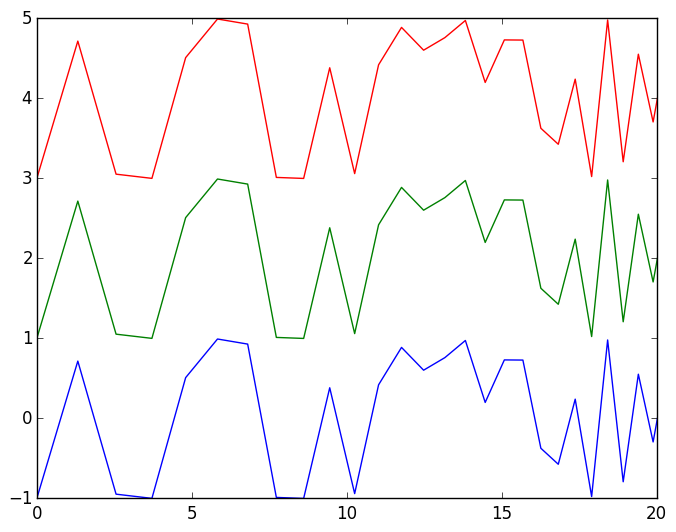

In [32]:
cosx=cos(x)
cosy=cos(y)+2
cosz=cos(z)+4

plot(t,cosx,"b")

plot(t,cosy,"g")

plot(t,cosz,"r")
xlim([0,20]);

#a primer orden solamente

In [9]:
function xjetN{T<:Number}(arr::Array{T,1},orden::Int,g::Function,σ::Number) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)                             #OJO AQUI CON SIGMA
    yjet=zeros(orden)
    zjet=zeros(orden)
  
    xjet[1]=arr[1] #cond. iniciales
    yjet[1]=arr[2]
    zjet[1]=arr[3]
  
    fx=zeros(orden)
    fy=zeros(orden)
    fz=zeros(orden)
   
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        az=Taylor1(zjet)
       
        bx,by,bz=g(ax,ay,az,σ)
        
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        fz[k]=bz.coeffs[k]
        
        
        xjet[k+1]=fx[k]/k
        yjet[k+1]=fy[k]/k
        zjet[k+1]=fz[k]/k
        
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    zaprox=Taylor1(zjet,orden)
  
    return xaprox,yaprox,zaprox
end 

 function integrate{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    ysolutions=T[]
    zsolutions=T[]

    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(ysolutions,initial[3])  
    push!(zsolutions,initial[4])

   
    i=0
    σ=0.5
    
    while t0<tmax 
        i=i+1
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i]]
        xaprox,yaprox,zaprox =xjetN(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
      
        
        push!(t,t0)
        push!(xsolutions,xaux) 
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
     
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions
end 
    
   
   

integrate (generic function with 1 method)

In [11]:

function graficar{T<:Number}(arr::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t,x,y,z=integrate(arr,orden,g,tmax,eps)
cosx=cos(x)
cosy=cos(y)+2
cosz=cos(z)+4

plot(t,cosx,"b")

plot(t,cosy,"g")

plot(t,cosz,"r")
xlim([0,tmax])
    end ;

In [14]:
function threeneurons_1ord(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    ω1=3.0
    ω2=1.0
    ω3=1.5
    phase12=14.0
    phase23=5.
    f1=ω1+cos(x)+σ
    f2=ω2+cos(y)-(cos(x+phase12))
    f3=ω3+cos(z)+cos(x+phase12)+cos(y+phase23)
    return f1,f2,f3
end 

threeneurons_1ord (generic function with 1 method)

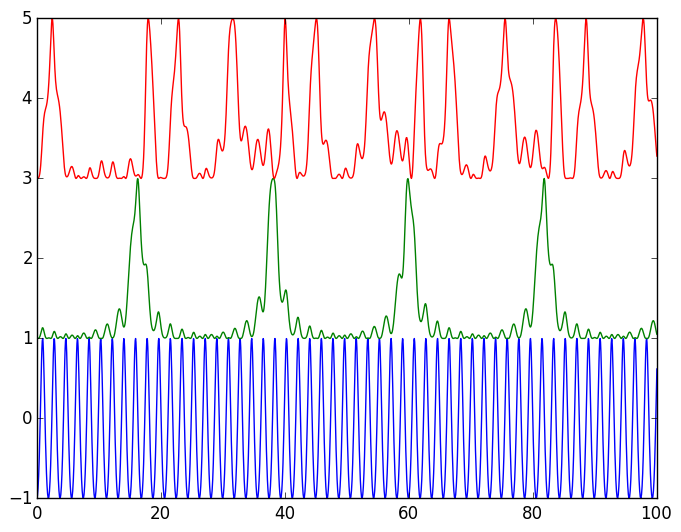

In [52]:
initial_cond=[0.0,-π,-π,-π]
graficar(initial_cond,15,threeneurons_1ord,100.0,1e-15);


#Estímulo no constante

In [26]:
sigma(t)=sin(5.0*t) #estímulo no cosntante

 function integrate2{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    ysolutions=T[]
    zsolutions=T[]

    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(ysolutions,initial[3])  
    push!(zsolutions,initial[4])

   
    i=0
    #σ=0.5
    
    while t0<tmax 
        i=i+1
        σ=sigma(t0)
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i]]
        xaprox,yaprox,zaprox =xjetN(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
      
        
        push!(t,t0)
        push!(xsolutions,xaux) 
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
     
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions
end 
    
function graficar2{T<:Number}(arr::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t,x,y,z=integrate2(arr,orden,g,tmax,eps)
cosx=cos(x)
cosy=cos(y)+2
cosz=cos(z)+4

plot(t,cosx,"b")

plot(t,cosy,"g")

plot(t,cosz,"r")
xlim([0,tmax])
    end ;
   

In [31]:
function threeneurons_1ord2(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    ω1=3.0
    ω2=1.0
    ω3=1.5
    phase12=14.0
    phase23=5.
    f1=ω1+cos(x)+σ
    f2=ω2+cos(y)-(cos(x+phase12))
    f3=ω3+cos(z)+cos(y+phase23)+cos(x+σ)#+phase12)
    return f1,f2,f3
end 

threeneurons_1ord2 (generic function with 1 method)

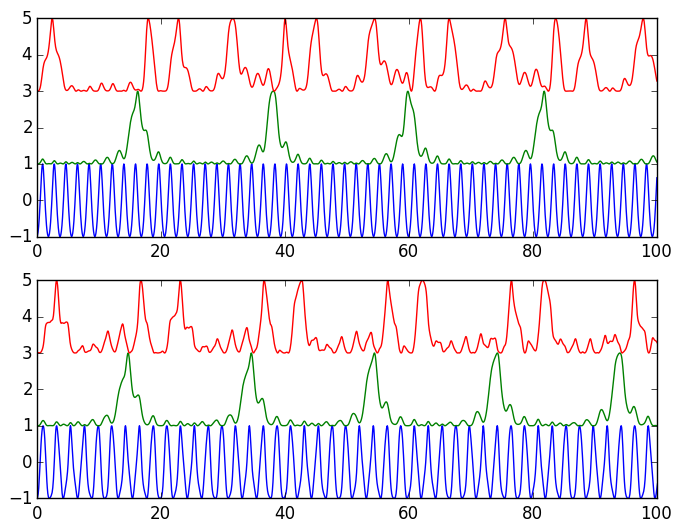

In [32]:
incond=[0.0,-π,-π,-π]
subplot(211)
graficar(incond,15,threeneurons_1ord,100.0,1e-15);
subplot(212)
graficar2(incond,15,threeneurons_1ord2,100.,1e-15) #estímulo no constante;